# Saving Slices

In this notebook we will take the needed steps to obtain a slice from both the CT and the masks images, in NIfTI format. The resulting slices will be stored as NumPy arrays, with no modifications at all.

Before executing this notebook, make sure you've downloaded the corresponding dataset. You can find the steps to do so in this project's **README.md** file.

First of all, import these libraries, both the CT and the masks export process need them:

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np

These variables store the values needed to perform the task, that is, the location of the dataset folder, the name of the CT and masks image files, the number of the slice we are interested in, and where the resulting file will be stored:

In [2]:
dataset_path = Path('../datasets/zenodo/')
image_path = Path('COVID-19-CT-Seg_20cases/radiopaedia_14_85914_0.nii.gz')
masks_path = Path('Lung_Mask/radiopaedia_14_85914_0.nii.gz')
slice_number = 0
data_folder_path = Path('data')

Now, let's load the CT image file:

In [3]:
image = nib.load(dataset_path / image_path)

print(f'Image shape: {image.shape}')
print(f'Image voxel axes orientations: {nib.aff2axcodes(image.affine)}')

Image shape: (630, 401, 110)
Image voxel axes orientations: ('L', 'A', 'S')


We are not yet using voxel axes orientations, but may do so in the future.

Let's get the slice from a proxy object to avoid loading the whole image into memory:

In [4]:
image_slice = image.dataobj[..., slice_number]

print(f'Image slice shape: {image_slice.shape}')

Image slice shape: (630, 401)


Now we can save the slice we are interested in:

In [5]:
image_slice_output_filename = f'{image_path.with_suffix("").stem}_image_slice_{slice_number}'
image_slice_output_path = data_folder_path / Path(image_slice_output_filename).with_suffix('.npy')

print(f'Image slice output path: "{image_slice_output_path}"')

np.save(image_slice_output_path, image_slice)

Image slice output path: "data/radiopaedia_14_85914_0_image_slice_0.npy"


Let's repeat the same process, now without interruptions, for the masks slice:

In [6]:
masks = nib.load(dataset_path / masks_path)

print(f'Masks shape: {masks.shape}')
print(f'Masks voxel axes orientations: {nib.aff2axcodes(masks.affine)}')

masks_slice = masks.dataobj[..., slice_number]

print(f'Masks slice shape: {masks_slice.shape}')

masks_slice_output_filename = f'{masks_path.with_suffix("").stem}_masks_slice_{slice_number}'
masks_slice_output_path = data_folder_path / Path(masks_slice_output_filename).with_suffix('.npy')

print(f'Masks slice output path: "{masks_slice_output_path}"')

np.save(masks_slice_output_path, masks_slice)

Masks shape: (630, 401, 110)
Masks voxel axes orientations: ('L', 'A', 'S')
Masks slice shape: (630, 401)
Masks slice output path: "data/radiopaedia_14_85914_0_masks_slice_0.npy"


Before finishing, what is in these NumPy arrays? Let's take a look at the slice, with the mask on top.

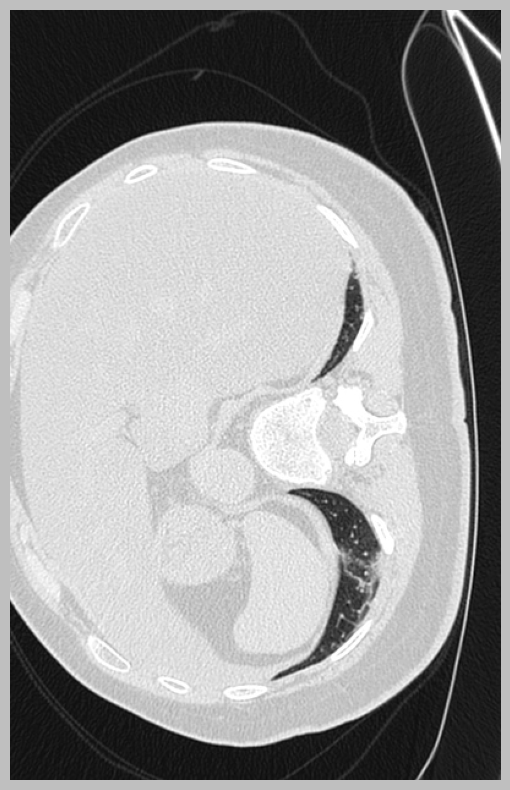

In [11]:
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.style.use('grayscale')
plt.imshow(image_slice)
plt.show()

And let's see the corresponding mask:

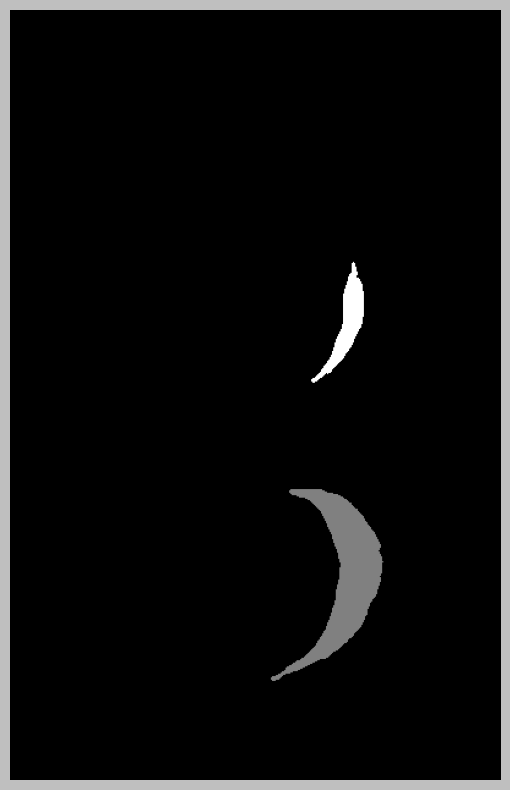

In [10]:
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.style.use('grayscale')
plt.imshow(masks_slice)
plt.show()

If you are interested in knowing why both the slice and the masks are shown rotated, take a look at the notebook **coordinates_conventions.ipynb**.